In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
%matplotlib inline

In [5]:

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
output_file = "FuelConsumption.csv"

urllib.request.urlretrieve(url, output_file)
print(f"File downloaded successfully as {output_file}")


File downloaded successfully as FuelConsumption.csv


In [ ]:
df = pd.read_csv("FuelConsumption.csv")

df.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [35]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [36]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

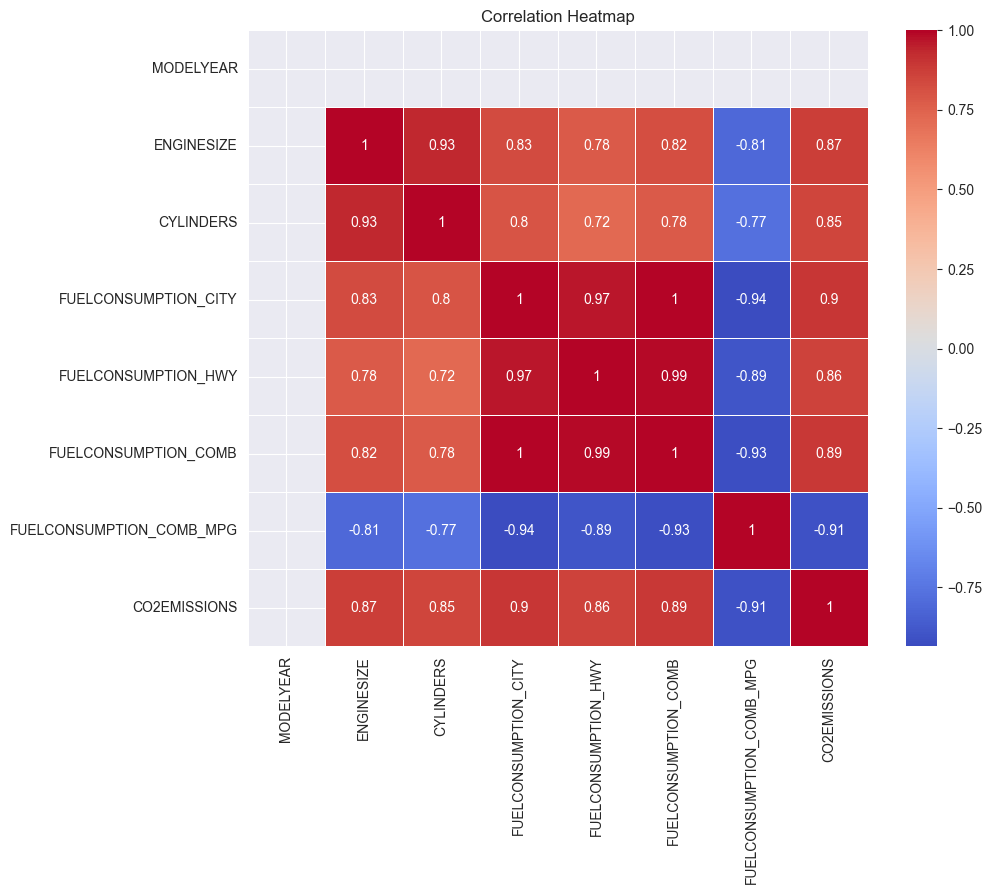

In [3]:
# Calculate the correlation matrix
corr = df.corr(numeric_only=True)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,8.5,9.9,196
1,2.4,4,9.6,11.2,221
2,1.5,4,5.9,6.0,136
3,3.5,6,11.1,12.7,255
4,3.5,6,10.6,12.1,244
5,3.5,6,10.0,11.9,230
6,3.5,6,10.1,11.8,232
7,3.7,6,11.1,12.8,255
8,3.7,6,11.6,13.4,267


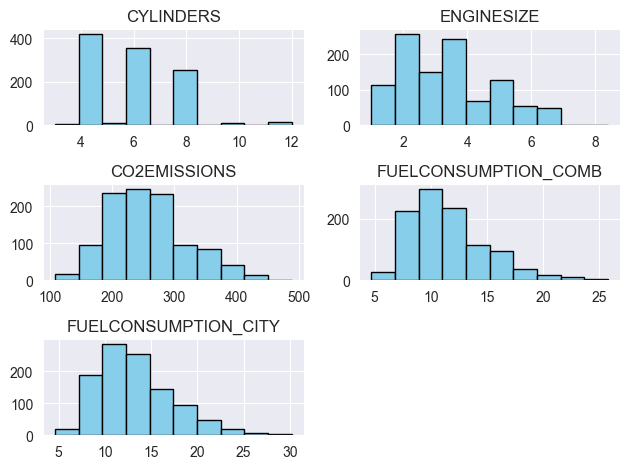

In [5]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY']]
viz.hist(color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

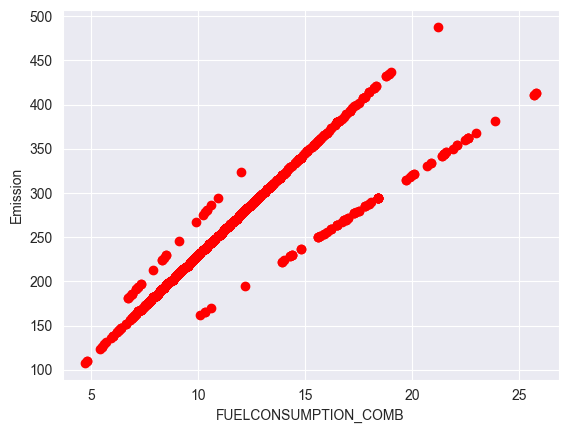

In [6]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='red')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

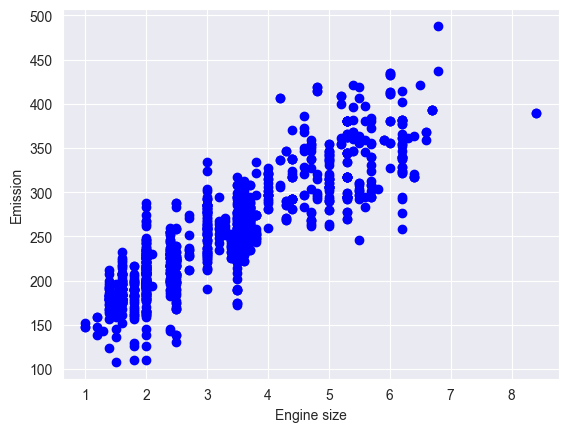

In [7]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

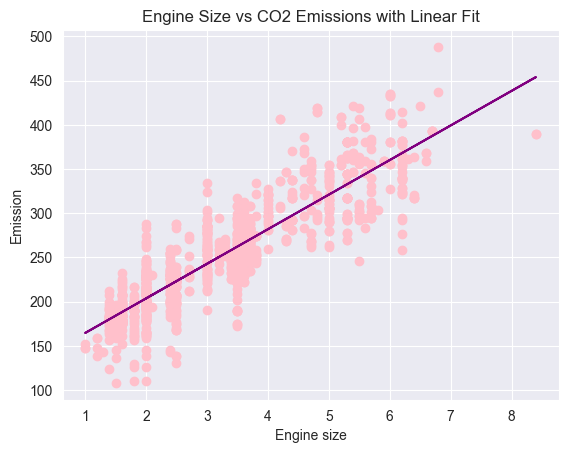

In [8]:
# Scatter plot
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='pink')

# Linear regression
x = cdf.ENGINESIZE
y = cdf.CO2EMISSIONS

# Fit the line: returns slope (m) and intercept (b)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='purple')  # Plot regression line

# Labels
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.title("Engine Size vs CO2 Emissions with Linear Fit")
plt.show()

In [9]:
cdf.shape

(1067, 5)

In [10]:
# Split the data
train, test = train_test_split(cdf, test_size=0.2, random_state=42)

# Check sizes (optional)
print("Train size:", train.shape)
print("Test size:", test.shape)

Train size: (853, 5)
Test size: (214, 5)


In [45]:
#msk = np.random.rand(len(cdf)) < 0.8
#train = cdf[msk]
#test = cdf[~msk]


train


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_CITY,CO2EMISSIONS
333,1.4,4,7.8,8.5,179
106,4.4,8,12.7,15.0,292
585,3.0,6,9.9,11.2,267
55,3.0,6,11.4,13.2,262
213,5.3,8,16.5,18.3,380
...,...,...,...,...,...
330,3.6,6,12.0,14.2,276
466,2.4,4,10.0,11.5,230
121,4.4,8,13.8,16.2,317
1044,1.8,4,8.6,10.0,198


In [46]:
test

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_CITY,CO2EMISSIONS
732,4.7,8,13.2,15.4,304
657,3.5,6,9.6,11.3,221
168,3.6,6,12.8,15.1,294
86,3.0,6,9.6,11.4,221
411,2.0,4,9.0,10.5,207
...,...,...,...,...,...
963,2.0,4,9.2,10.2,212
294,2.4,4,10.0,12.0,230
275,2.4,4,10.1,11.7,232
903,3.0,6,11.3,13.4,260


In [47]:
# Step 2: Define features (X) and target (y)  multiple linear
features = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_CITY']

train_x = train[features]
train_y = train['CO2EMISSIONS']

test_x = test[features]
test_y = test['CO2EMISSIONS']

# Step 3: Train the model
model = LinearRegression()
model.fit(train_x, train_y)

# Step 4: Make predictions
predictions = model.predict(test_x)

# Step 5: Evaluate the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R² Score:", r2_score(test_y, predictions))
print("MAE:", mean_absolute_error(test_y, predictions))
print("MSE:", mean_squared_error(test_y, predictions))


Coefficients: [11.22848637  7.02981136  8.59874079  0.82593521]
Intercept: 67.70854224582254
R² Score: 0.8762931005866279
MAE: 16.7014112037083
MSE: 511.5212867295268


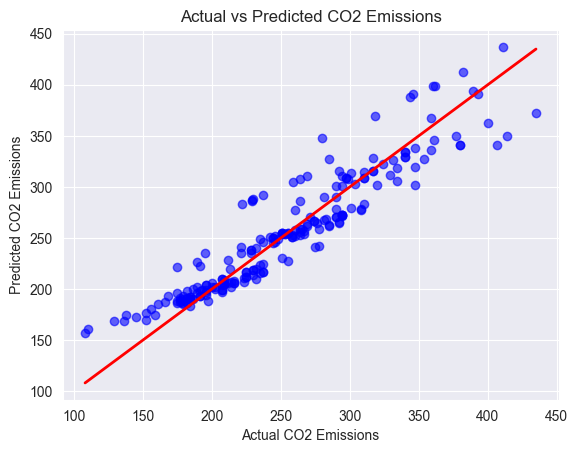

In [48]:
# Step 6: Optional — Visualize actual vs predicted
plt.scatter(test_y, predictions, color='blue', alpha=0.6)
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], color='red', linewidth=2)
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted CO2 Emissions")
plt.grid(True)
plt.show()

In [62]:
# Feature and target  simple non-linear
X = cdf[['ENGINESIZE']]
y = cdf['CO2EMISSIONS']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Define degree
degree = 3

# Create polynomial features
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit linear model on polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict
y_pred = model.predict(X_test_poly)

print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [ 0.         29.92154206  3.7724906  -0.41363227]
Intercept:  131.2985849194281


In [64]:
print("R² Score:", r2_score(y_test, y_pred))


R² Score: 0.7701245696899559


C:\Users\Mahroo Noohi\OneDrive\Desktop\test\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


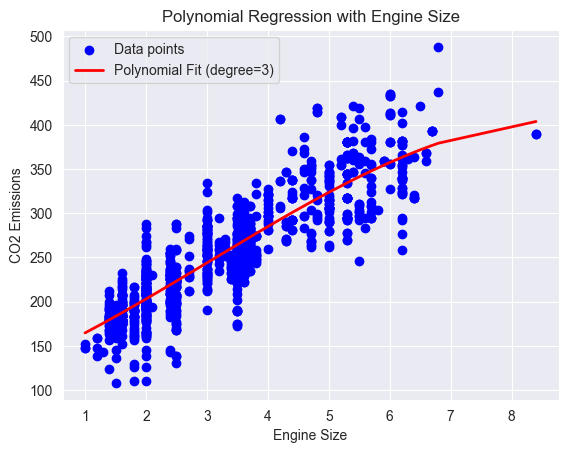

In [66]:
# Sort values for smooth curve
X_sorted = np.sort(X.values, axis=0)
X_sorted_poly = poly.transform(X_sorted)
y_sorted_pred = model.predict(X_sorted_poly)

# Plot
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_sorted, y_sorted_pred, color='red', linewidth=2, label='Polynomial Fit (degree=3)')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.title("Polynomial Regression with Engine Size")
plt.legend()
plt.grid(True)
plt.show()


In [11]:

# Select multiple features
X = cdf[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_CITY']]
y = cdf['CO2EMISSIONS']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
degree = 4

# Create polynomial features
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit linear model on polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict
y_pred = model.predict(X_test_poly)

print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [ 4.19803217e-07  2.16232692e+02 -6.42398219e+02 -8.27369976e+02
  6.08024032e+02 -3.74455974e+02  1.64018376e+02  1.02432939e+02
 -2.73140247e+01  1.62328915e+02  1.85204899e+02 -2.11226671e+02
  2.51213817e+02 -3.66170090e+02  1.47566140e+02 -2.15766227e+02
  3.62192745e+02 -9.33609189e-01  5.85653100e+01 -1.56950255e+02
  5.10384944e+01 -1.15704343e+02  2.47950351e+01 -8.01099921e+01
  4.87802321e+01 -6.19133253e-01 -5.75612044e+01  7.15846028e+01
 -4.82657348e+01  9.36792580e+01 -4.27749631e+01 -4.71642864e+01
  1.04319079e+02 -7.58511051e+01  1.70033886e+01 -3.99351084e+01
  1.12912781e+02 -3.29796220e+01  3.58254744e+01 -1.04107467e+02
  8.84031847e+01 -9.98171349e+01  1.52856079e+01 -3.94388790e+01
  2.33736451e+01  3.90725787e+01 -6.88814054e+01  7.46119257e+01
 -1.20412025e+01  3.14119233e+01 -1.66677933e+01 -4.47045812e+00
  6.26257221e+00  1.80021805e+00 -3.67973153e+00 -4.22992552e+00
  1.47731220e+01 -1.61649562e+01  6.84615789e+00 -9.50239681e+00
  2.804391

In [17]:
print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.9503234099038063


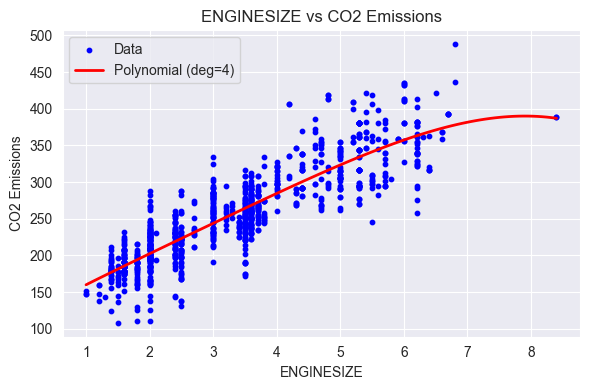

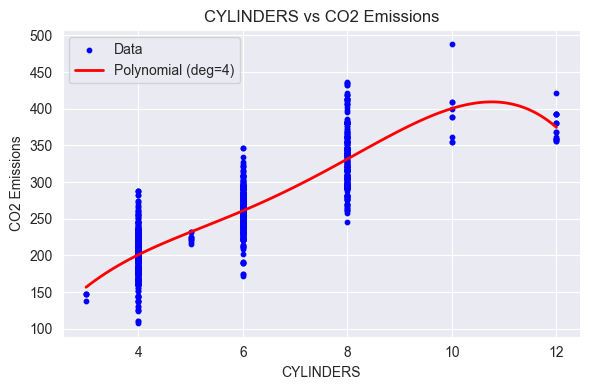

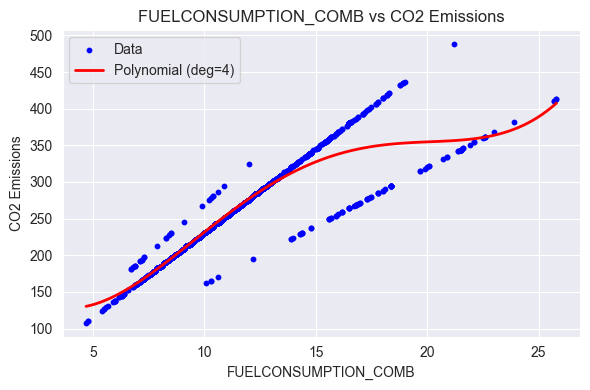

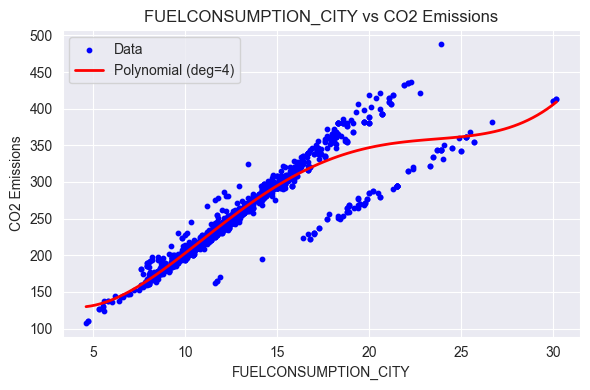

In [ ]:

features = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_CITY']

degree = 4 

for feature in features:
    X_feature = cdf[[feature]].values  # 2D array
    y = cdf['CO2EMISSIONS'].values

    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_feature)

    # Train model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict for smooth curve
    X_range = np.linspace(X_feature.min(), X_feature.max(), 100).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)
    y_range_pred = model.predict(X_range_poly)

    plt.figure(figsize=(6, 4))
    plt.scatter(X_feature, y, color='blue', s=10, label='Data')
    plt.plot(X_range, y_range_pred, color='red', linewidth=2, label=f'Polynomial (deg={degree})')
    plt.title(f'{feature} vs CO2 Emissions')
    plt.xlabel(feature)
    plt.ylabel('CO2 Emissions')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()